__7. Using the data from Question 4, write code to analyze the data and answer the following questions__ 

__Note -__
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

__Insights to be drawn -__
* Get all the Earth meteorites that fell before the year 2000
* Get all the earth meteorites co-ordinates who fell before the year 1970
* Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

Error occurred during datetime conversion: Out of bounds nanosecond timestamp: 1583-01-01 00:00:00 present at position 174


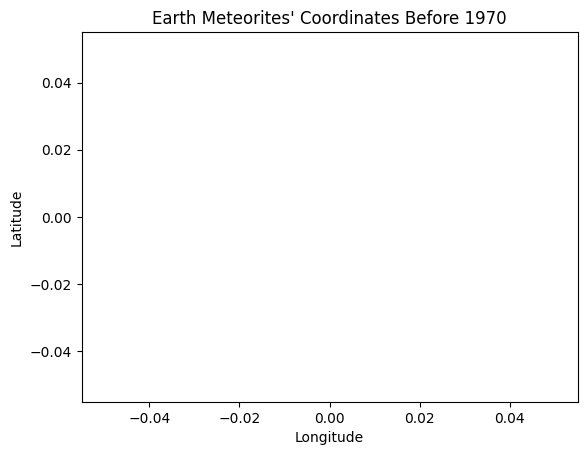

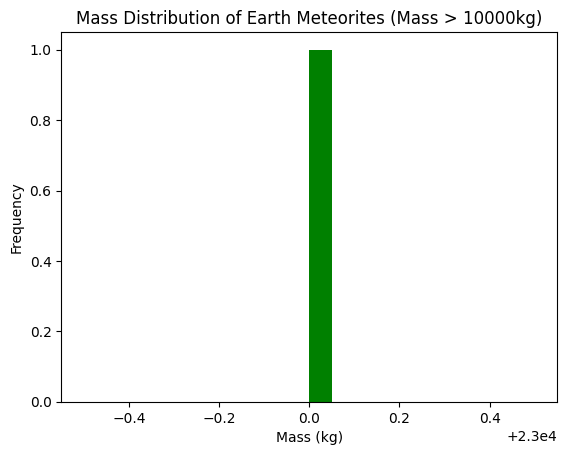

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the URL to retrieve the data
url = "https://data.nasa.gov/resource/y77d-th95.json"

# Send a GET request to retrieve the data
response = requests.get(url)

# Get the JSON data from the response
data = response.json()

# Convert the data to a DataFrame for easier analysis
df = pd.DataFrame(data)

# Convert the "year" column to datetime format with error handling
try:
    df['year'] = pd.to_datetime(df['year'], format="%Y-%m-%dT%H:%M:%S.%f")
except Exception as e:
    print(f"Error occurred during datetime conversion: {str(e)}")
    df['year'] = pd.NaT

# Task 1: Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df[df['reclat'].notna() & (df['year'].dt.year < 2000)]

# Task 2: Get all the Earth meteorites' coordinates that fell before the year 1970
earth_meteorites_before_1970 = df[df['reclat'].notna() & (df['year'].dt.year < 1970)][['reclat', 'reclong']]

# Task 3: Get all Earth meteorites with mass greater than 10000kg
earth_meteorites_mass_gt_10000 = df[df['mass'].astype(float) / 1000 > 10000]

# Plotting

# Scatter plot of Earth meteorites' coordinates before 1970
plt.scatter(
    earth_meteorites_before_1970['reclong'].astype(float),
    earth_meteorites_before_1970['reclat'].astype(float),
    marker='o',
    color='blue'
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites\' Coordinates Before 1970')
plt.show()

# Histogram of Earth meteorites' masses greater than 10000kg
plt.hist(
    earth_meteorites_mass_gt_10000['mass'].astype(float) / 1000,
    bins=20,
    color='green'
)
plt.xlabel('Mass (kg)')
plt.ylabel('Frequency')
plt.title('Mass Distribution of Earth Meteorites (Mass > 10000kg)')
plt.show()
